# Plot a few of the spherical MNIST digits

In [1]:
# imports and definitions

import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.utils.data as data_utils

import gzip
import pickle

import matplotlib.pyplot as plt

import os

import numpy as np

from icosahedron import Icosahedron, rand_rotation_icosahedron, rand_rotation_matrix, plot_voronoi, plot_voronoi_charts

In [2]:
# function to give dataloaders and datasets

def load_data(path, batch_size):

    with gzip.open(path, 'rb') as f:
        dataset = pickle.load(f)

    train_data = torch.from_numpy(
        dataset["train"]["images"][:, None, :, :].astype(np.float32))
    train_labels = torch.from_numpy(
        dataset["train"]["labels"].astype(np.int64))

    train_dataset = data_utils.TensorDataset(train_data, train_labels)
    train_loader = data_utils.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    test_data = torch.from_numpy(
        dataset["test"]["images"][:, None, :, :].astype(np.float32))
    test_labels = torch.from_numpy(
        dataset["test"]["labels"].astype(np.int64))

    test_dataset = data_utils.TensorDataset(test_data, test_labels)
    test_loader = data_utils.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

    return train_loader, test_loader, train_dataset, test_dataset

In [3]:
train_rot_type = "norot"
test_rot_type = "norot"
MNIST_PATH = "MNIST_data/sph_ico_mnist_train_{}_test_{}.gz".format(train_rot_type, test_rot_type)

In [4]:
batchsize=5
train_loader, test_loader, train_dataset, test_dataset = load_data(MNIST_PATH, batchsize)

In [5]:
ico = Icosahedron(r=4)
regions, vertices = ico.get_voronoi_regions_vertices()

In [6]:
digits = next(iter(train_loader))[0].reshape(batchsize,-1)
digits = np.array(digits)


In [7]:
from plotting import *

0
1
2
3
4


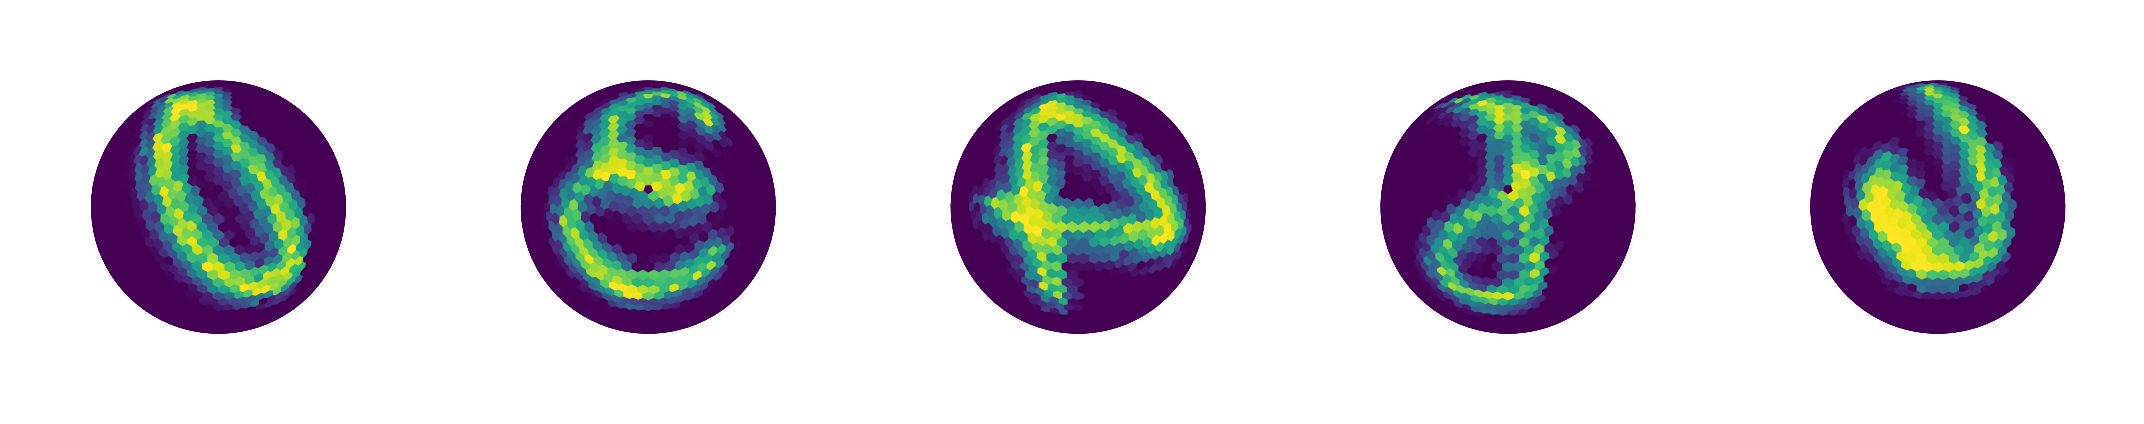

In [13]:
fig = plt.figure(figsize=np.array([batchsize,1])*digit_style["FIGSIZE"])

for i in range(batchsize):
    print(i)
    ax= fig.add_subplot(1,5,i+1, projection='3d')
    plot_map_3d(ax, digits[i], {"RESOLUTION": 4}, digit_style, elev = -100, show_colorbar=False, show_coastlines=False)
    plt.axis("off")
fig.tight_layout()

plt.savefig("Images/MNIST_DIGITS.png")
plt.savefig("Images/MNIST_DIGITS.pdf")
plt.savefig("Images/MNIST_DIGITS.jpg")
plt.savefig("Images/MNIST_DIGITS.svg")
plt.show()

